In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

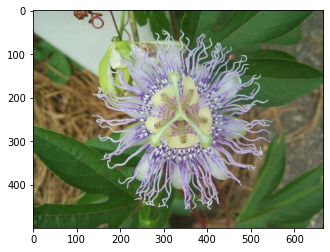

In [2]:
img = cv2.imread('/home/telescreen/Workspace/Data/Flowers/image_00004.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

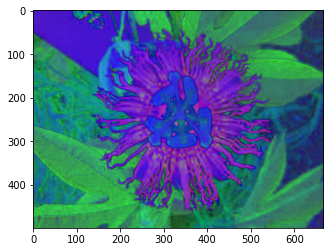

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img)

### Blending and Pasting Images

Blending and Pasting Images using `addWeight`

In [4]:
img1 = cv2.imread('/home/telescreen/Workspace/Data/Flowers/image_00004.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('/home/telescreen/Workspace/Data/donotcopy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

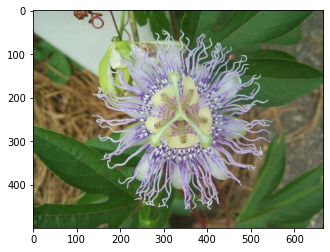

In [5]:
plt.imshow(img1)

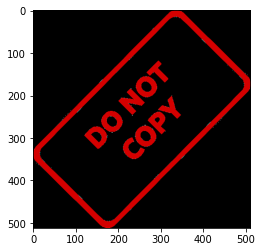

In [6]:
plt.imshow(img2)

In [7]:
img1.shape

(500, 667, 3)

In [8]:
img2.shape

(512, 511, 3)

In [9]:
img2 = cv2.resize(img2, (667, 500))

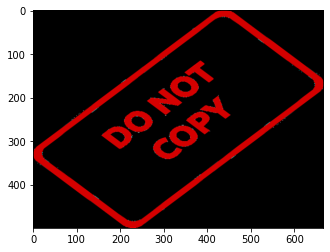

In [10]:
plt.imshow(img2)

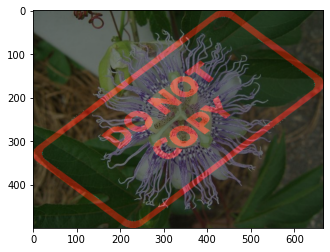

In [11]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0.1)
plt.imshow(blended)

In [12]:
# Blending using Numpy array operation

In [13]:
img1 = cv2.imread('/home/telescreen/Workspace/Data/Flowers/image_00004.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('/home/telescreen/Workspace/Data/donotcopy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

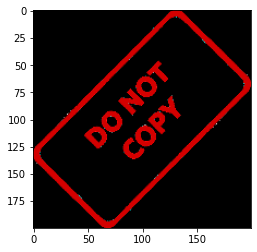

In [14]:
img2 = cv2.resize(img2, (200, 200))
plt.imshow(img2)

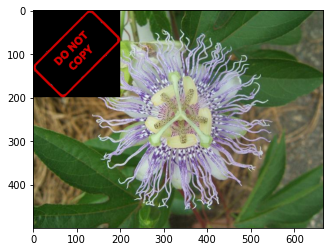

In [15]:
x_off = 0
y_off = 0
x_end = x_off + img2.shape[1]
y_end = y_off + img2.shape[0]

img1[y_off:y_end, x_off:x_end] = img2
plt.imshow(img1)

In [16]:
## Blending image with the region of interest

In [17]:
img1 = cv2.imread('/home/telescreen/Workspace/Data/Flowers/image_00004.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('/home/telescreen/Workspace/Data/donotcopy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [18]:
img2 = cv2.resize(img2, (200, 200))
rows, cols, channels = img2.shape
print(rows, cols)

200 200


In [19]:
img1.shape

(500, 667, 3)

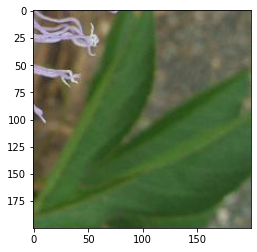

In [20]:
x_off = img1.shape[0] - rows
y_off = img1.shape[1] - cols
roi = img1[x_off:, y_off:]
plt.imshow(roi)

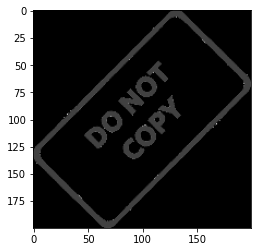

In [21]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap='gray')

In [22]:
img2gray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [24]:
bk = cv2.bitwise_or(white_background, white_background, mask=img2gray)

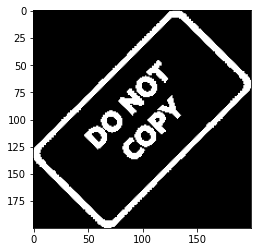

In [25]:
plt.imshow(bk)

In [26]:
fg = cv2.bitwise_or(img2, img2, mask=img2gray)

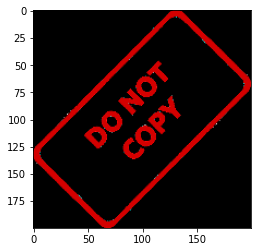

In [27]:
plt.imshow(fg)

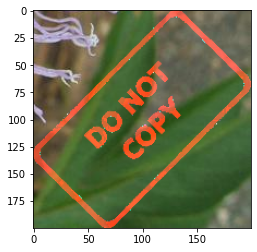

In [28]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

In [29]:
large_img = img1.copy()
small_img = final_roi

In [30]:
large_img[x_off:x_off+small_img.shape[0], y_off:y_off + small_img.shape[1]] = small_img

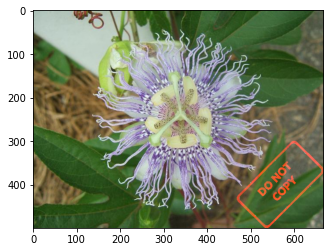

In [31]:
plt.imshow(large_img)

## Image Thresholding

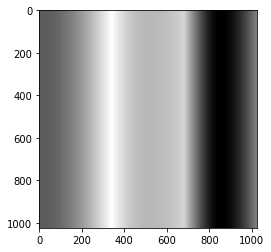

In [32]:
img = cv2.imread('/home/telescreen/Workspace/Data/rainbow.png', 0)
plt.imshow(img, cmap='gray')

In [33]:
img.max()

241

In [34]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)

In [35]:
ret

127.0

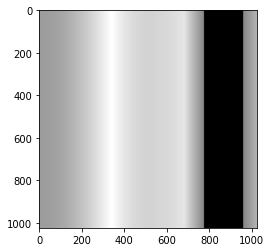

In [36]:
plt.imshow(thresh1, cmap='gray')

## Blurring and Smoothing Image

In [56]:
def load_img(path):
    img = cv2.imread(path).astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [50]:
def disp_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [91]:
def disp2(img1, img2):
    fig = plt.figure(figsize=(24,14))
    ax = fig.add_subplot(121)
    ax.imshow(img1)
    ax = fig.add_subplot(122)
    ax.imshow(img2)

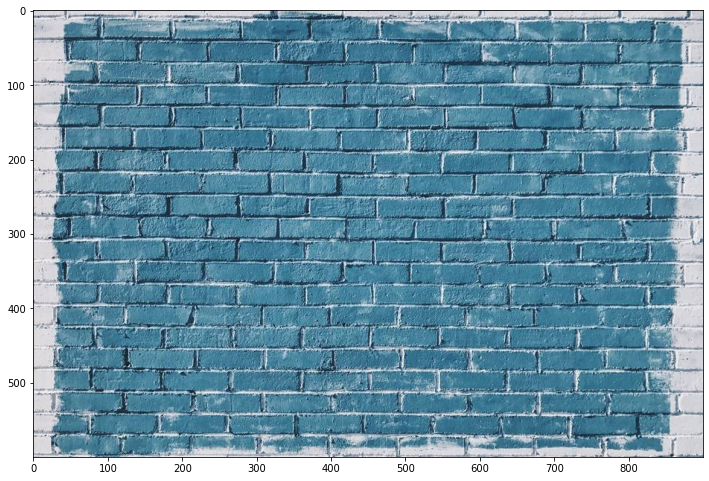

In [57]:
img = load_img('/home/telescreen/Workspace/Data/blue_bricks.jpg')
disp_img(img)

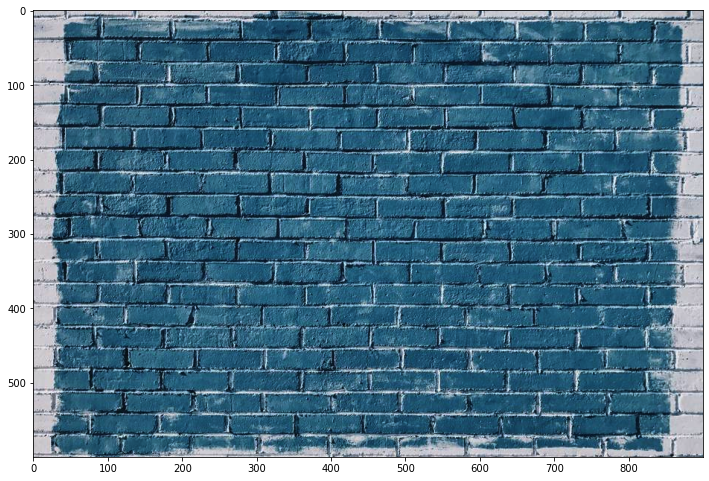

In [61]:
gamma = 1.5
result = np.power(img, gamma)
disp_img(result)

In [79]:
img = load_img('/home/telescreen/Workspace/Data/blue_bricks.jpg')
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, text="bricks", org=(10, 300), fontFace=font, fontScale=8, color=(255, 0, 0), thickness=4);

In [76]:
kernel = np.ones(shape=(5,5), dtype=np.float32)/25
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


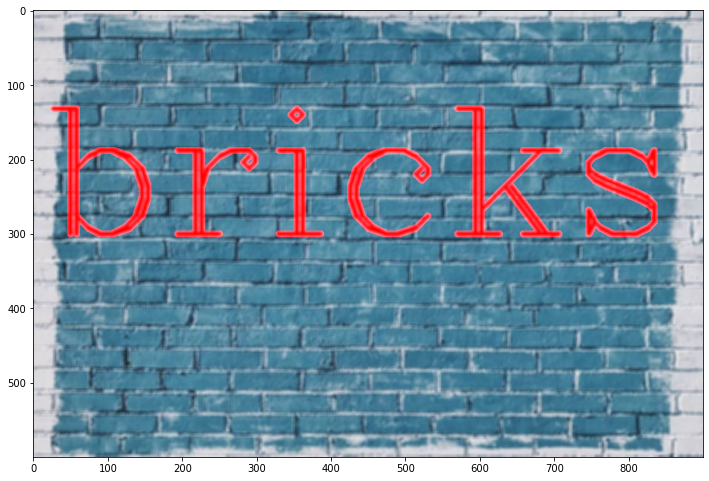

In [77]:
dst = cv2.filter2D(img, -1, kernel)
disp_img(dst)

In [80]:
img = load_img('/home/telescreen/Workspace/Data/blue_bricks.jpg')
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, text="bricks", org=(10, 300), fontFace=font, fontScale=8, color=(255, 0, 0), thickness=4);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


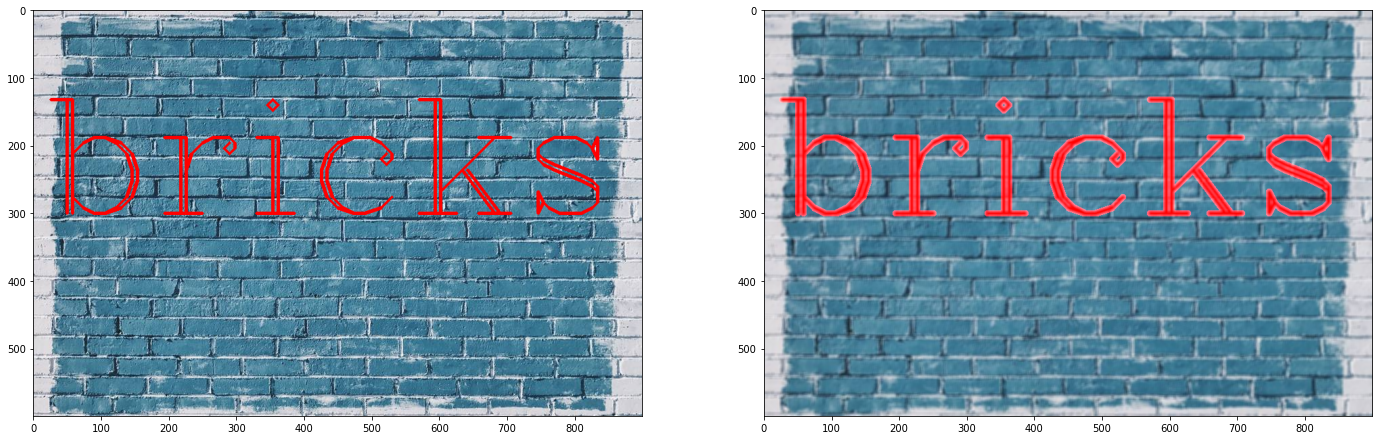

In [94]:
dst = cv2.blur(img, ksize=(5,5))
disp2(img, dst)

In [106]:
img = load_img('/home/telescreen/Workspace/Data/blue_bricks.jpg')
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, text="bricks", org=(10, 300), fontFace=font, fontScale=8, color=(255, 0, 0), thickness=4);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


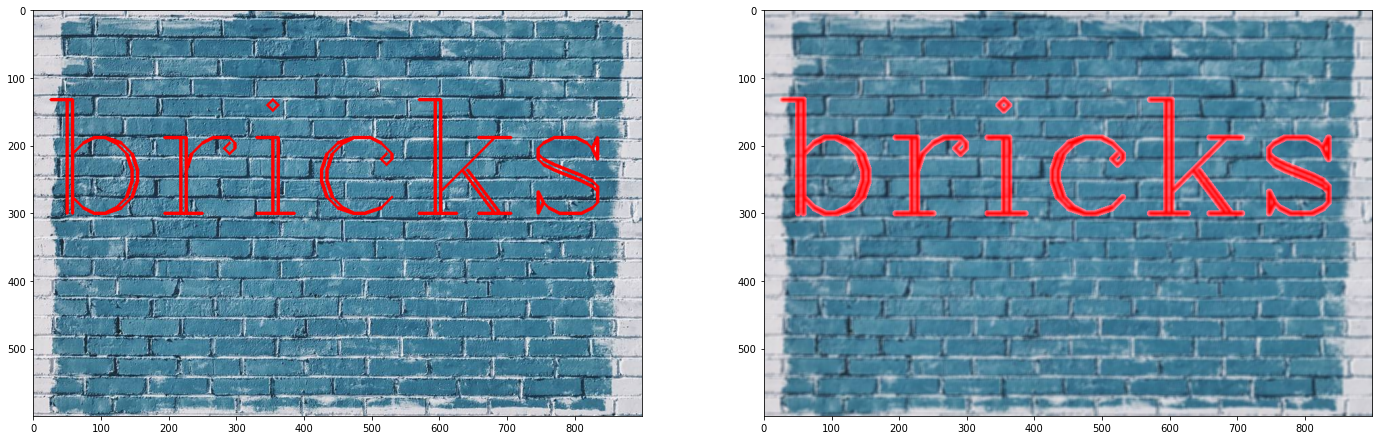

In [107]:
dst = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=30)
disp2(img, dst)

In [108]:
img = load_img('/home/telescreen/Workspace/Data/blue_bricks.jpg')
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, text="bricks", org=(10, 300), fontFace=font, fontScale=8, color=(255, 0, 0), thickness=4);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


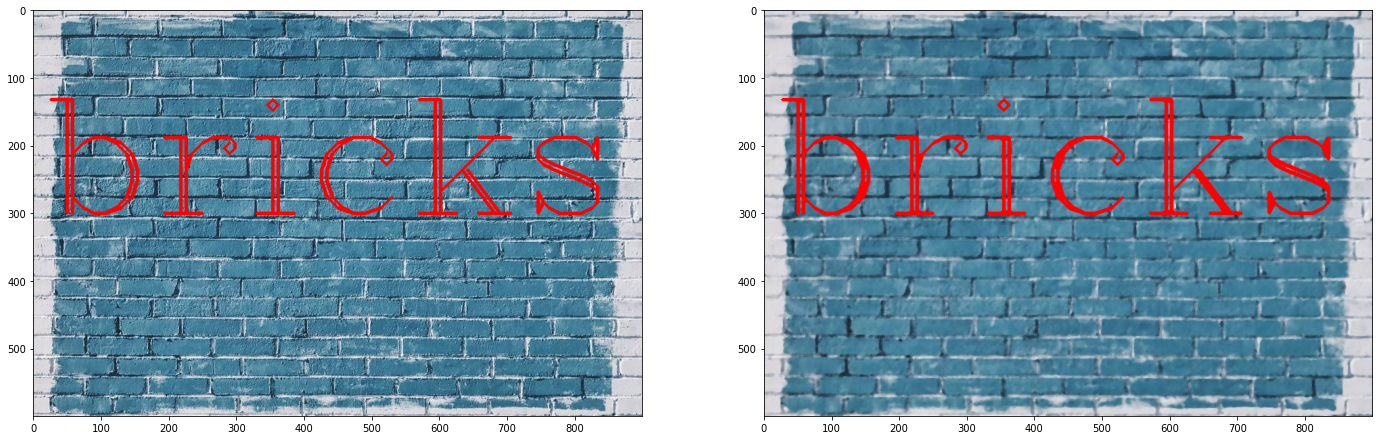

In [109]:
dst = cv2.medianBlur(img, ksize=5)
disp2(img, dst)